In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 

In [2]:
# choose a binary classification problem
data = load_breast_cancer()

In [3]:
 # develop predictors X and target y dataframes
 X = pd.DataFrame(data['data'], columns=data['feature_names'])
 X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
 y = abs(pd.Series(data['target'])-1)
 y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [5]:
 # split data into train and test set in 80:20 ratio
 X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [6]:
 # build a RF model with default parameters
 model = RandomForestClassifier(random_state=1)
 model.fit(X_train, y_train)
 preds = model.predict(X_test) 

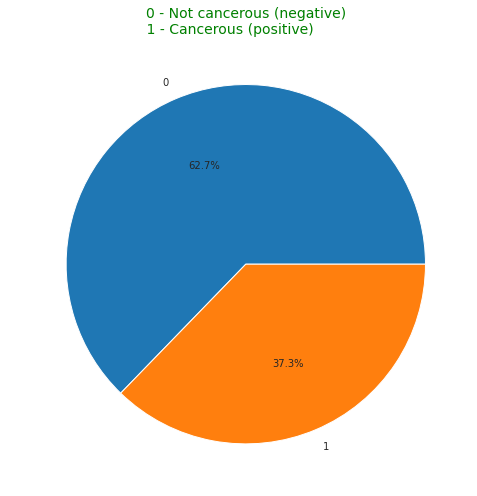

In [7]:
 plt.figure(figsize=(7,7))
 y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
 plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)        ', size=14, c='green')
 plt.tight_layout(); plt.show() 

**Confusion Matrix**

True Positive: Actually positive (ground truth), predicted as positive (correctly classified)

True Negative: Actually negative (ground truth), predicted as negative (correctly classified)

False Positive: Actually negative (ground truth), predicted as positive (misclassified)

False Negative: Actually positive (ground truth), predicted as negative (misclassified)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


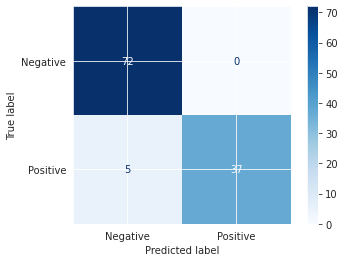

In [8]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'],cmap='Blues')

In [9]:
 confusion = metrics.confusion_matrix(y_test, preds)
 confusion.ravel() 

array([72,  0,  5, 37])

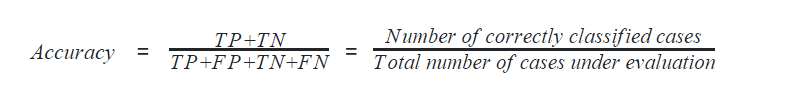

In [10]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.956140350877193

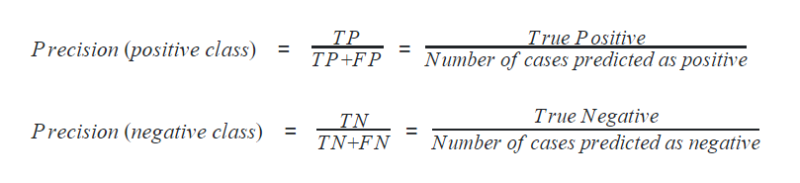

In [11]:
 precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
 precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
 precision_positive, precision_negative 

(1.0, 0.935064935064935)

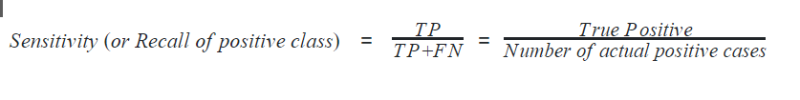

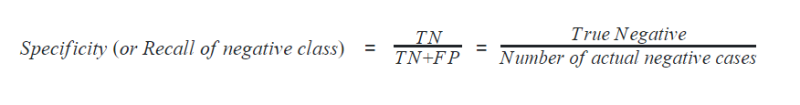

In [12]:
 recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
 recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
 recall_sensitivity, recall_specificity  

(0.8809523809523809, 1.0)